In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score, classification_report, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [ ]:
df.tail(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9990,5.783299,4.726614,1.340273,8.617933,4.587533,-1.950574,-1.594137,-1.042822,0.445853,0.645680,0.406864,0.726180,0.028673,unstable
9991,0.998988,9.924916,8.926563,2.885941,3.660232,-1.103521,-1.105641,-1.451070,0.717660,0.954919,0.491107,0.692023,0.008260,unstable
9992,3.114442,4.781072,2.427918,7.989509,2.673156,-0.918191,-0.652736,-1.102228,0.867950,0.888858,0.460587,0.965026,0.064645,unstable
9993,5.754191,3.032743,5.084803,4.633624,5.199250,-1.717030,-1.713212,-1.769009,0.157284,0.975921,0.511555,0.696591,0.050212,unstable
9994,2.042954,8.514335,8.173809,5.466635,3.783797,-1.639912,-0.662469,-1.481417,0.154129,0.944486,0.053225,0.499109,0.026311,unstable
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


In [ ]:
df.describe(include='all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


# Following the material provided in "***Instructions for Tag-Along Project***"

The direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable ( ***BINARY CLASSIFICATION*** )

In [ ]:
df = df.drop('stab', axis=1)
df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable


Now we are left with a single dependent variable ( ***stabf*** ) and 12 independent variables ( ***tau[1-4], p[1-4], g[1-4]*** )

Now moving on with splitting the data acc. to the provided instructions

In [ ]:
features_df = df.drop('stabf', axis=1)
target_var = df['stabf']

#Using train-test-split to split the train-test data in ratio 80:20 with a random state of 1
x_train, x_test, y_train, y_test = train_test_split(features_df, target_var, test_size=0.2, random_state=1)

#Using the standard scaler to transform the train set and the test set
scaler = StandardScaler()

x_train_norm = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test_norm = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

# Answering the questions

# Question 1:

What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

In [ ]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(x_train_norm, y_train)
pred_test = rfc.predict(x_test_norm)
accuracy = accuracy_score(y_test, pred_test)
print('Accuracy: {}'.format(round(accuracy, 4)))  #round upto 4 decimal places

Accuracy: 0.929


# Question 3:
Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [ ]:
#ExtraTreesClassifier model with no hyperparameter tuning

etc = ExtraTreesClassifier(random_state = 1)
etc.fit(x_train_norm, y_train)
pred_test2 = etc.predict(x_test_norm)
accuracy = accuracy_score(y_test, pred_test2)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.928


In [ ]:
#ExtraTreesClassifier model with hyperparameter tuning from the RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

rsv = RandomizedSearchCV(etc, hyperparameter_grid, cv=5, n_iter = 10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)
search = rsv.fit(x_train_norm, y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [ ]:
etc = ExtraTreesClassifier(**search.best_params_, random_state = 1)
etc.fit(x_train_norm, y_train)
pred_test3 = etc.predict(x_test_norm)
accuracy = accuracy_score(y_test, pred_test3)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.927


Accuracy with hyperparameter tuning is lower than without hyperparameter tuning

# Question 8:

What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(x_train_norm, y_train)
pred_test4 = xgbc.predict(x_test_norm)
accuracy = accuracy_score(y_test, pred_test4)
print('Accuracy: {}'.format(round(accuracy, 4)))  #round upto 4 decimal places

Accuracy: 0.9195


# Question 12:

Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

In [ ]:
feature_imp = pd.Series(etc.feature_importances_,  x_train_norm.columns).sort_values()
feature_imp

p1      0.003683
p4      0.004962
p2      0.005337
p3      0.005429
g1      0.102562
g2      0.107578
g4      0.109541
g3      0.113063
tau3    0.134680
tau4    0.135417
tau1    0.137240
tau2    0.140508
dtype: float64

Feature with max importance: tau2

Feature with min importance: p1

# Question 13:
Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [ ]:
#From question: 3

search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

# Question 14:

You are working on a spam classification system using regularized logistic regression. “Spam” is a positive class (y = 1) and “not spam” is the negative class (y = 0). You have trained your classifier and there are n = 1700 examples in the test set. The confusion matrix of predicted class vs. actual class is:

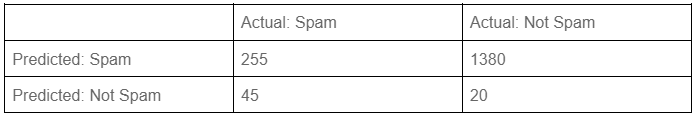

What is the F1 score of this classifier?

F1_score = 2 * (Precision * Recall) / (Precision + Recall)

Precision = TP / TP + FP = 255 / 255 + 1380 = 0.1559

Recall = TP / TP + FN = 255 / 255 + 45 = 0.85

F1_score = 2 * (0.1559 * 0.85) / (0.1559 + 0.85) = 0.26347 = 0.2635

# Question 18:

What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [ ]:
lgbmc = LGBMClassifier(random_state = 1)
lgbmc.fit(x_train_norm, y_train)
pred_test5 = lgbmc.predict(x_test_norm)
accuracy = accuracy_score(y_test, pred_test5)
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9375
